In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN, LSTM, Embedding, Dense, Dropout
from tensorflow.keras.models import Sequential
from collections import Counter
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataTrain = pd.read_csv('train_preprocessed.csv')
dataTest = pd.read_csv('test_preprocessed.csv')

In [5]:
dataTrain.head()

,id,keyword,location,text,target,textNoURL,onehotURL,text2sentence,sentenceLen,text2word,text2wordNoStopword,text2wordLemmatize
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,0,['Our Deeds are the Reason of this #earthquake...,1,"['deeds', 'the', 'reason', 'this', 'earthquake...","['deeds', 'the', 'reason', 'this', 'earthquake...","['deed', 'the', 'reason', 'this', 'earthquake'..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,0,"['Forest fire near La Ronge Sask.', 'Canada']",2,"['forest', 'fire', 'near', 'la', 'ronge', 'sas...","['forest', 'fire', 'near', 'la', 'ronge', 'sas...","['forest', 'fire', 'near', 'la', 'ronge', 'sas..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,0,"[""All residents asked to 'shelter in place' ar...",2,"['residents', 'asked', ""'shelter"", ""place'"", '...","['residents', 'asked', ""'shelter"", ""place'"", '...","['resident', 'asked', ""'shelter"", ""place'"", 'b..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",0,"['13,000 people receive #wildfires evacuation ...",1,"['13', '000', 'people', 'receive', 'wildfires'...","['13', '000', 'people', 'receive', 'wildfires'...","['13', '000', 'people', 'receive', 'wildfire',..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,0,['Just got sent this photo from Ruby #Alaska a...,1,"['got', 'sent', 'photo', 'ruby', 'alaska', 'sm...","['got', 'sent', 'photo', 'ruby', 'alaska', 'sm...","['got', 'sent', 'photo', 'ruby', 'alaska', 'sm..."


In [6]:
dataTest.head()

,id,keyword,location,text,textNoURL,onehotURL,text2sentence,sentenceLen,text2word,text2wordNoStopword,text2wordLemmatize
0,0,NaN,NaN,Just happened a terrible car crash,Just happened a terrible car crash,0,['Just happened a terrible car crash'],1,"['happened', 'terrible', 'car', 'crash']","['happened', 'terrible', 'car', 'crash']","['happened', 'terrible', 'car', 'crash']"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","Heard about #earthquake is different cities, s...",0,"['Heard about #earthquake is different cities,...",1,"['heard', 'earthquake', 'different', 'cities',...","['heard', 'earthquake', 'different', 'cities',...","['heard', 'earthquake', 'different', 'city', '..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","there is a forest fire at spot pond, geese are...",0,"['there is a forest fire at spot pond, geese a...",1,"['is', 'forest', 'fire', 'spot', 'pond', 'gees...","['is', 'forest', 'fire', 'spot', 'pond', 'gees...","['is', 'forest', 'fire', 'spot', 'pond', 'goos..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting. #Spokane #wildfires,0,"['Apocalypse lighting.', '#Spokane #wildfires']",2,"['apocalypse', 'lighting', 'spokane', 'wildfir...","['apocalypse', 'lighting', 'spokane', 'wildfir...","['apocalypse', 'lighting', 'spokane', 'wildfire']"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills 28 in China and Taiwan,0,['Typhoon Soudelor kills 28 in China and Taiwan'],1,"['typhoon', 'soudelor', 'kills', '28', 'china'...","['typhoon', 'soudelor', 'kills', '28', 'china'...","['typhoon', 'soudelor', 'kill', '28', 'china',..."


In [3]:
dataAlltext = pd.concat([dataTrain['textNoURL'],dataTest['textNoURL']])

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataAlltext)
seqs = tokenizer.texts_to_sequences(dataAlltext)

In [6]:
word_to_index = tokenizer.word_index
word_to_index

{'the': 1,
 'a': 2,
 'to': 3,
 'in': 4,
 'of': 5,
 'and': 6,
 'i': 7,
 'is': 8,
 'for': 9,
 'on': 10,
 'you': 11,
 'my': 12,
 'it': 13,
 'with': 14,
 'that': 15,
 'by': 16,
 'at': 17,
 'this': 18,
 'from': 19,
 'are': 20,
 'be': 21,
 'was': 22,
 'amp': 23,
 'have': 24,
 'like': 25,
 'as': 26,
 'up': 27,
 'just': 28,
 'me': 29,
 'but': 30,
 'not': 31,
 'so': 32,
 'your': 33,
 'out': 34,
 'no': 35,
 'will': 36,
 'all': 37,
 'after': 38,
 'fire': 39,
 'an': 40,
 'we': 41,
 "i'm": 42,
 'if': 43,
 'when': 44,
 'has': 45,
 'get': 46,
 'new': 47,
 'via': 48,
 'more': 49,
 'about': 50,
 '2': 51,
 'now': 52,
 'or': 53,
 'he': 54,
 'how': 55,
 'news': 56,
 'people': 57,
 'one': 58,
 'they': 59,
 'what': 60,
 "it's": 61,
 'who': 62,
 'over': 63,
 'been': 64,
 'do': 65,
 'into': 66,
 'can': 67,
 "'": 68,
 "don't": 69,
 'video': 70,
 'emergency': 71,
 'disaster': 72,
 'there': 73,
 'would': 74,
 '3': 75,
 'police': 76,
 'her': 77,
 'his': 78,
 'than': 79,
 'u': 80,
 'were': 81,
 'still': 82,
 'some

In [7]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 14044
단어 집합(vocabulary)에서 희귀 단어의 비율: 61.8188220794084
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.999852608508975


In [8]:
tokenizer = Tokenizer(num_words = total_cnt - rare_cnt + 1)
tokenizer.fit_on_texts(dataAll)
seqs = tokenizer.texts_to_sequences(dataAll)

In [9]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 22719


In [10]:
n_of_train = int(len(dataTrain))
n_of_test = int(len(seqs) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 7613
테스트 데이터의 개수: 3263


최대 길이 : 32
평균 길이 : 13.056547


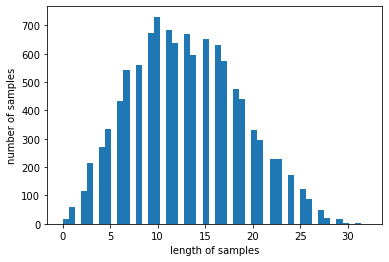

In [11]:
X_data = seqs
print('최대 길이 : %d' % max(len(l) for l in X_data))
print('평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [12]:
max_len=max(len(l) for l in X_data)
data_pad = pad_sequences(X_data, maxlen = max_len)

In [13]:
X_test = data_pad[n_of_train:]
X_val = data_pad[int(n_of_train*0.9):n_of_train] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
y_val = np.array(dataTrain['target'][int(n_of_train*0.9):n_of_train].astype(float)) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장
X_train = data_pad[:int(n_of_train*0.9)] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(dataTrain['target'][:int(n_of_train*0.9)].astype(float)) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장

### modeling - RNN

In [37]:
modelRNN = Sequential()
modelRNN.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
modelRNN.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
modelRNN.add(Dense(1, activation='sigmoid'))
modelRNN.add(Dropout(0.1))

modelRNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
historyRNN = modelRNN.fit(X_train, y_train, epochs=8, batch_size=128)

print("\n 테스트 정확도: %.4f" % (modelRNN.evaluate(X_val, y_val)[1]))

Train on 6851 samples
Epoch 1/8
6851/6851 [==============================] - 3s 384us/sample - loss: 1.2035 - acc: 0.6409
Epoch 2/8
6851/6851 [==============================] - 1s 167us/sample - loss: 1.0505 - acc: 0.8015
Epoch 3/8
6851/6851 [==============================] - 1s 172us/sample - loss: 0.9452 - acc: 0.8523
Epoch 4/8
6851/6851 [==============================] - 1s 172us/sample - loss: 0.8948 - acc: 0.8819
Epoch 5/8
6851/6851 [==============================] - 1s 167us/sample - loss: 0.7805 - acc: 0.9140s - loss: 0.7572 - ac
Epoch 6/8
6851/6851 [==============================] - 1s 179us/sample - loss: 0.7253 - acc: 0.9207
Epoch 7/8
6851/6851 [==============================] - 1s 175us/sample - loss: 0.6975 - acc: 0.9295
Epoch 8/8
762/762 [==============================] - 0s 525us/sample - loss: 0.5453 - acc: 0.7507

 테스트 정확도: 0.7507


In [38]:
y_test_RNN = modelRNN.predict(X_test)
y_test_RNN = [i[0] for i in y_test_RNN.tolist()]
y_tested_RNN = [0]*len(y_test_RNN)
for i,k in enumerate(y_test_RNN):
    if k >= 0.5: y_tested_RNN[i]=1

Counter(y_tested_RNN)

Counter({0: 2016, 1: 1247})

In [39]:
RNNAnswer = pd.read_csv('sample_submission.csv')
RNNAnswer['target'] = y_tested_RNN

In [40]:
RNNAnswer.to_csv('submission_3rd_RNN.csv',index=False)

### modeling - LSTM

In [35]:
modelLSTM = Sequential()
modelLSTM.add(Embedding(vocab_size, 16))
modelLSTM.add(LSTM(16))
modelLSTM.add(Dense(1, activation='sigmoid'))
modelLSTM.add(Dropout(0.2))

modelLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
historyLSTM = modelRNN.fit(X_train, y_train, epochs=4, batch_size=1024)

print("\n 테스트 정확도: %.4f" % (modelLSTM.evaluate(X_val, y_val)[1]))

Train on 6851 samples
Epoch 1/4
6851/6851 [==============================] - 0s 62us/sample - loss: 1.3809 - acc: 0.8977
Epoch 2/4
6851/6851 [==============================] - 0s 56us/sample - loss: 1.4247 - acc: 0.8962
Epoch 3/4
6851/6851 [==============================] - 0s 65us/sample - loss: 1.4453 - acc: 0.8934
Epoch 4/4
762/762 [==============================] - 1s 930us/sample - loss: 0.6929 - acc: 0.5249

 테스트 정확도: 0.5249


In [68]:
y_test_LSTM = modelLSTM.predict(X_test)
y_test_LSTM = [i[0] for i in y_test_LSTM.tolist()]
y_tested_LSTM = [0]*len(y_test_LSTM)
for i,k in enumerate(y_test_LSTM):
    if k >= 0.5: y_tested_LSTM[i]=1

Counter(y_tested_LSTM)

Counter({0: 1772, 1: 1491})

In [69]:
LSTMAnswer = pd.read_csv('sample_submission.csv')
LSTMAnswer['target'] = y_tested_LSTM

In [70]:
LSTMAnswer.to_csv('submission_2nd_LSTM.csv',index=False)

### modeling - RF with other variables

In [73]:
tree = RandomForestRegressor()
dataAll = pd.concat([dataTrain,dataTest])
dataAll['targeted'] = dataTrain['target'][:n_of_train].tolist() + y_test_RNN
tree.fit(dataAll[['onehotURL','sentenceLen']],dataAll['targeted'])
y_test_RF = tree.predict(dataAll.iloc[len(dataTrain):][['onehotURL','sentenceLen']])

In [74]:
y_tested_RF = [0]*len(y_test_RF)
for i,k in enumerate(y_test_RF):
    if k >= 0.5: y_tested_RF[i]=1

Counter(y_tested_RF)

Counter({0: 1942, 1: 1321})

In [75]:
RFAnswer = pd.read_csv('sample_submission.csv')
RFAnswer['target'] = y_tested_RF

In [76]:
RFAnswer.to_csv('submission_3rd_RF.csv',index=False)